<h2>Problem Definition</h2>

People are always confused about their medical insurance and don't know the cost of insurance at different ages and conditions. This data is useful for these people and is useful to make predictions of the insurance cost they will have to pay.

In [120]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

<h2>LOADING DATA</h2>

In [121]:
data = pd.read_csv('./archive/insurance.csv')

In [122]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h2>UNDERSTANDING DATA</h2>

In [123]:
data.shape

(1338, 7)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [125]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [126]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [127]:
print(data.dtypes)
data.head()

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h2>DATA PREPROCESSING</h2>

In [128]:
data['sex'] = data['sex'].astype('category')
data['region'] = data['region'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [129]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [130]:
smoke_data = data.groupby("smoker")['charges'].mean().round(2)
print(smoke_data)
smoke_data = data.groupby("smoker")['age'].mean().round(2)
print(smoke_data)
smoke_data = data.groupby("smoker")['bmi'].mean().round(2)
print(smoke_data)
smoke_data = data.groupby("smoker")['children'].mean().round(2)
print(smoke_data)

smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64
smoker
no     39.39
yes    38.51
Name: age, dtype: float64
smoker
no     30.65
yes    30.71
Name: bmi, dtype: float64
smoker
no     1.09
yes    1.11
Name: children, dtype: float64


<h2>EDA</h2>

In [131]:
sns.set_style('whitegrid')

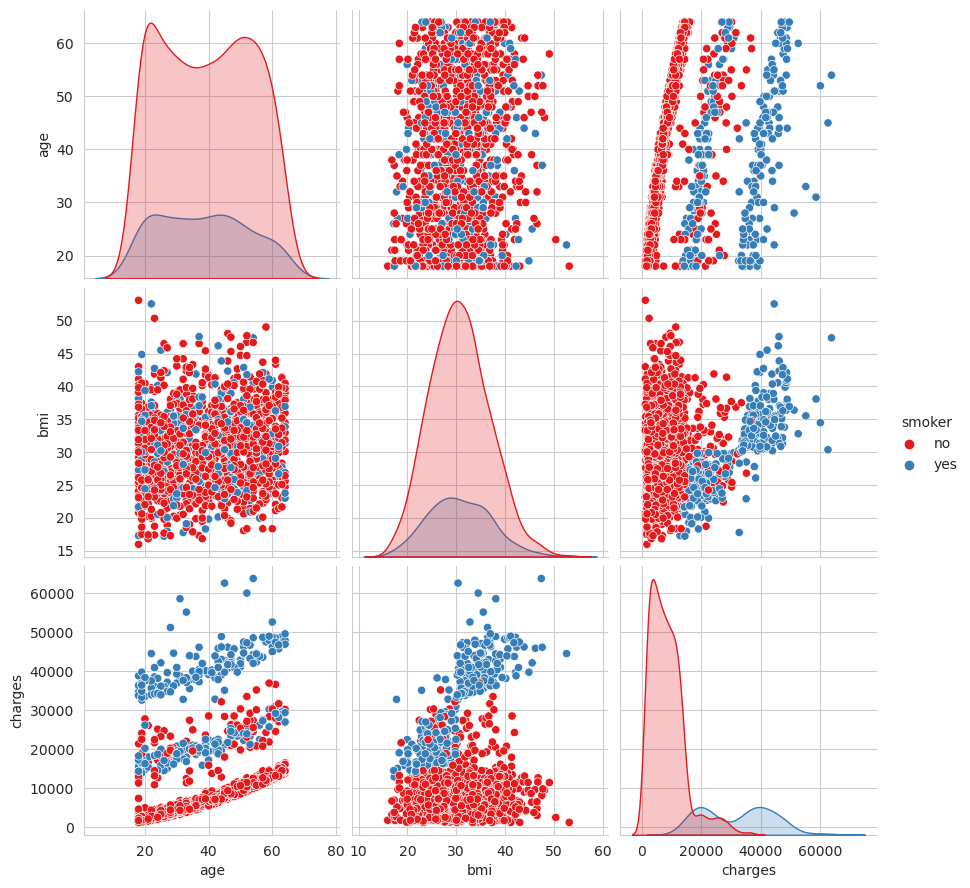

In [132]:
sns.pairplot(
    data[['age','bmi','charges','smoker']],
    hue = 'smoker',
    height=3,
    palette='Set1'
)

<AxesSubplot:>

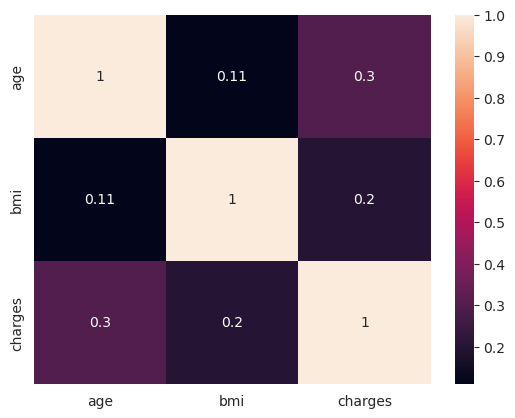

In [133]:
sns.heatmap(data[['age','bmi','charges']].corr(),annot=True)

<h2>Feature Selection and Engineering</h2>

In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaling_data = data[['age','bmi','children']]

In [157]:
data = data.drop(columns=['age','bmi','children'],axis=1)
data.head()

,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,16884.92400,True,False,False,True,False,False,False,True
1,1725.55230,False,True,True,False,False,False,True,False
2,4449.46200,False,True,True,False,False,False,True,False
3,21984.47061,False,True,True,False,False,True,False,False
4,3866.85520,False,True,True,False,False,True,False,False


In [160]:
scaled_data = pd.DataFrame(scaler.fit_transform(scaling_data),columns=['age','bmi','children'])
data = pd.concat([scaled_data,data],axis=1)
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,16884.92400,True,False,False,True,False,False,False,True
1,0.000000,0.479150,0.2,1725.55230,False,True,True,False,False,False,True,False
2,0.217391,0.458434,0.6,4449.46200,False,True,True,False,False,False,True,False
3,0.326087,0.181464,0.0,21984.47061,False,True,True,False,False,True,False,False
4,0.304348,0.347592,0.0,3866.85520,False,True,True,False,False,True,False,False


In [161]:
data = pd.get_dummies(data) #onehotencoding
data.shape

(1338, 12)

In [162]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,16884.92400,True,False,False,True,False,False,False,True
1,0.000000,0.479150,0.2,1725.55230,False,True,True,False,False,False,True,False
2,0.217391,0.458434,0.6,4449.46200,False,True,True,False,False,False,True,False
3,0.326087,0.181464,0.0,21984.47061,False,True,True,False,False,True,False,False
4,0.304348,0.347592,0.0,3866.85520,False,True,True,False,False,True,False,False


In [164]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

<h2>BUILDING MODEL</h2>

In [165]:
y = data['charges']
y.head().round(2)

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: charges, dtype: float64

In [166]:
X = data.drop('charges',axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,True,False,False,True,False,False,False,True
1,0.000000,0.479150,0.2,False,True,True,False,False,False,True,False
2,0.217391,0.458434,0.6,False,True,True,False,False,False,True,False
3,0.326087,0.181464,0.0,False,True,True,False,False,True,False,False
4,0.304348,0.347592,0.0,False,True,True,False,False,True,False,False


In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,
    train_size=0.80,
    random_state=1
)

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
model = LinearRegression()

In [171]:
model.fit(X_train,y_train)

LinearRegression()

<h2>MODEL EVALUATION</h2>

In [172]:
model.score(X_test,y_test).round(2)

0.76

In [173]:
model.score(X_train,y_train).round(2)

0.75

If the performance of the model on the training data was high, it would mean that there is an <b>overfitting</b> problem. To overcome the overfitting problem, we can use <b>regularization</b>. Ridge or lasso models can be used for this.

In [148]:
y_pred = model.predict(X_test)
print(y_test[0:5])
y_pred[0:5]

559      1646.4297
1087    11353.2276
1020     8798.5930
460     10381.4787
802      2103.0800
Name: charges, dtype: float64


array([ 4383.68089988, 12885.03892192, 12589.21653212, 13286.22919217,
         544.72832757])

# Metrics

In [174]:
from sklearn.metrics import mean_squared_error
import math

In [175]:
math.sqrt(mean_squared_error(y_test, y_pred))

5956.454717976427

<h2>MODEL PREDICTION</h2>

In [176]:
data_row_1 = X_train[:1]
data_row_1

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
216,0.76087,0.286252,0.0,True,False,True,False,False,True,False,False


In [177]:
model.predict(data_row_1).round(2)

array([10560.])

In [178]:
y_train[:1].round(2)

216    10355.64
Name: charges, dtype: float64

# libs for EDA 

> pandas_profiling
> sweetwiz
> dtale
> autowiz 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
data = load_iris()
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df.shape

(150, 4)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] = data.target

In [8]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Autowiz

In [12]:
from autoviz import AutoViz_Class
from matplotlib import pyplot as pyplot
%matplotlib inline
AV = AutoViz_Class()

Shape of your Data Set loaded: (150, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    5 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix data quality issues automatically, import FixDQ from autoviz...
    Alert: Dropping 1 duplicate rows can sometimes cause column data types to change to object. Double-check!


AttributeError: 'ColormapRegistry' object has no attribute 'get_cmap'

Number of All Scatter Plots = 10


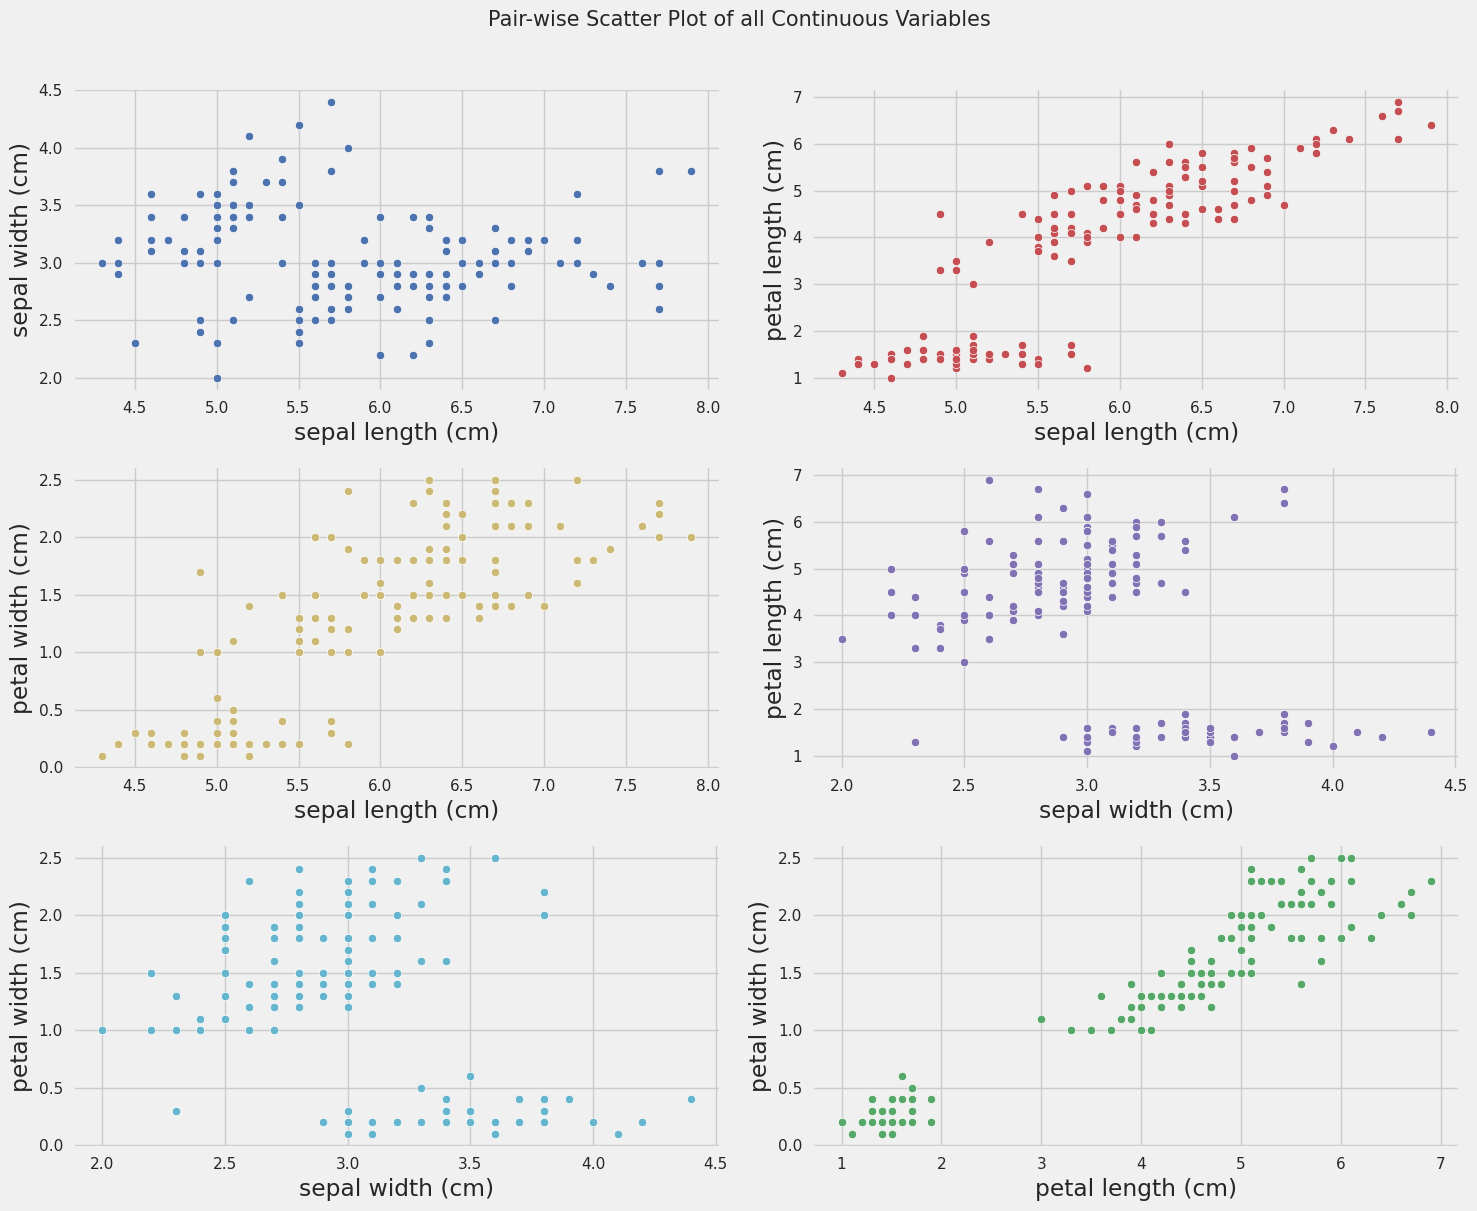

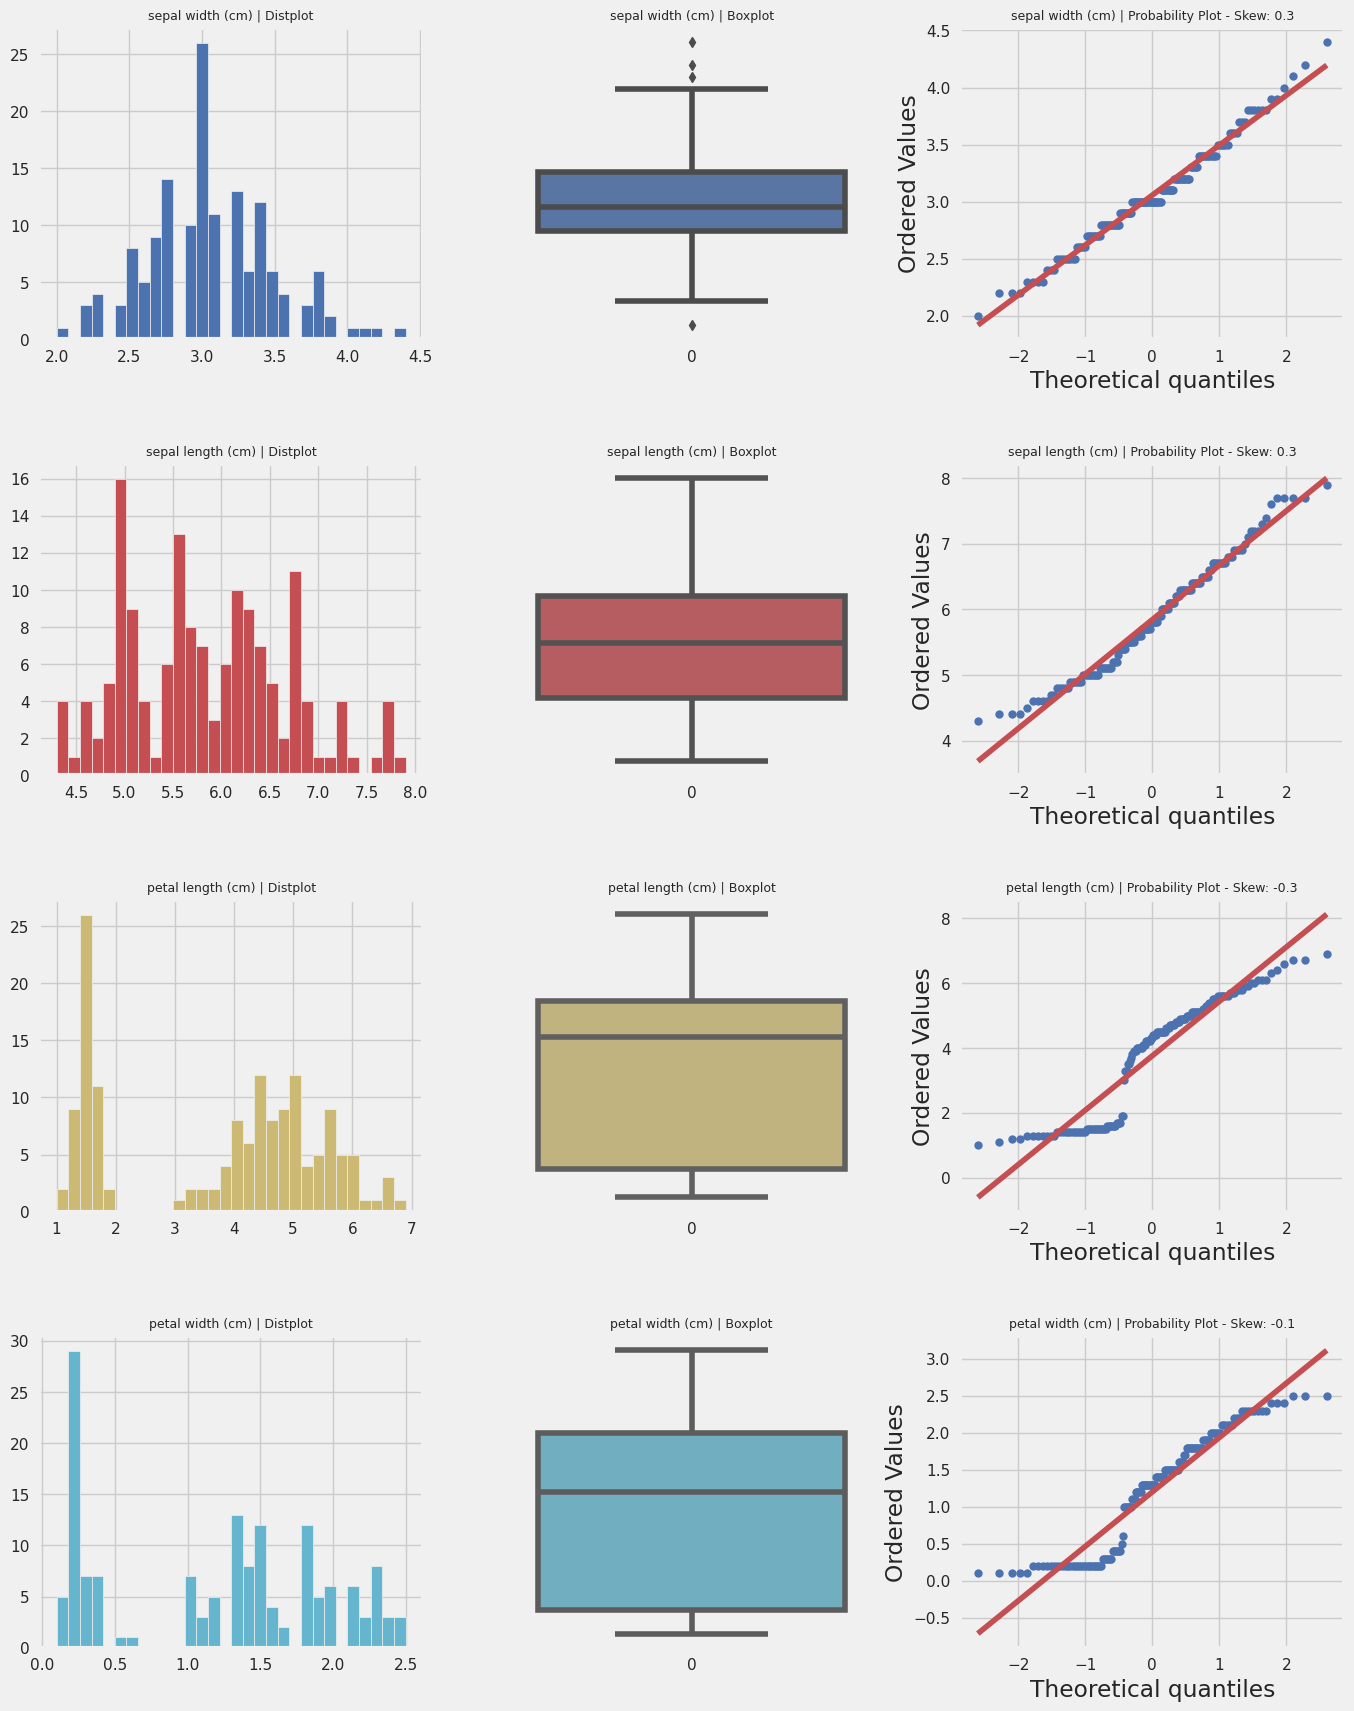

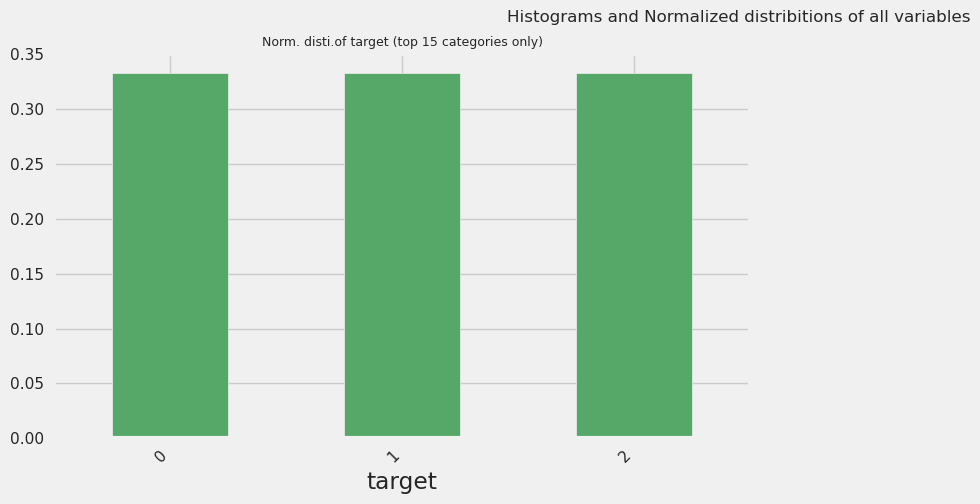

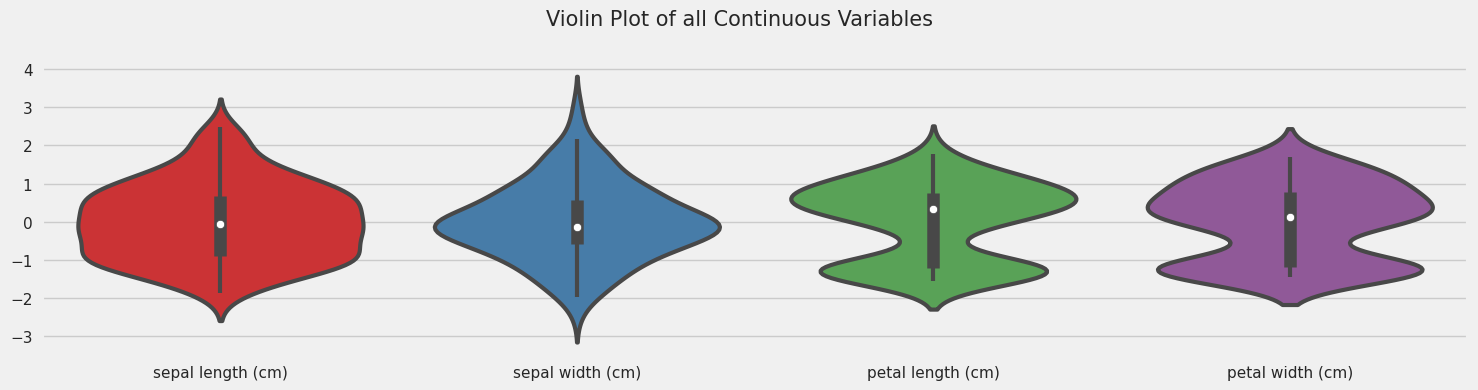

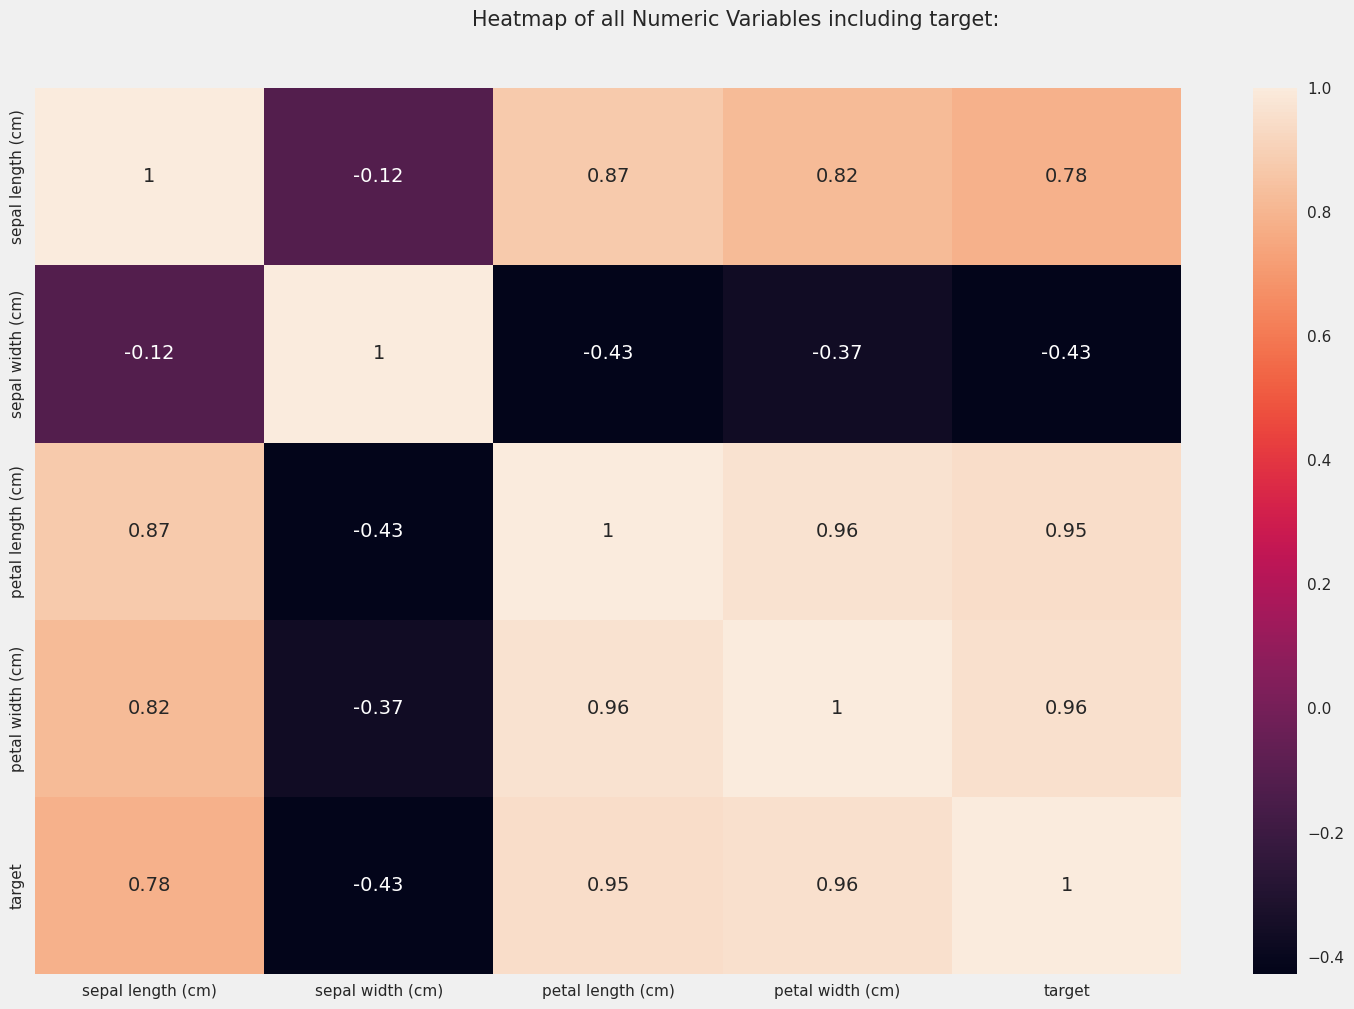

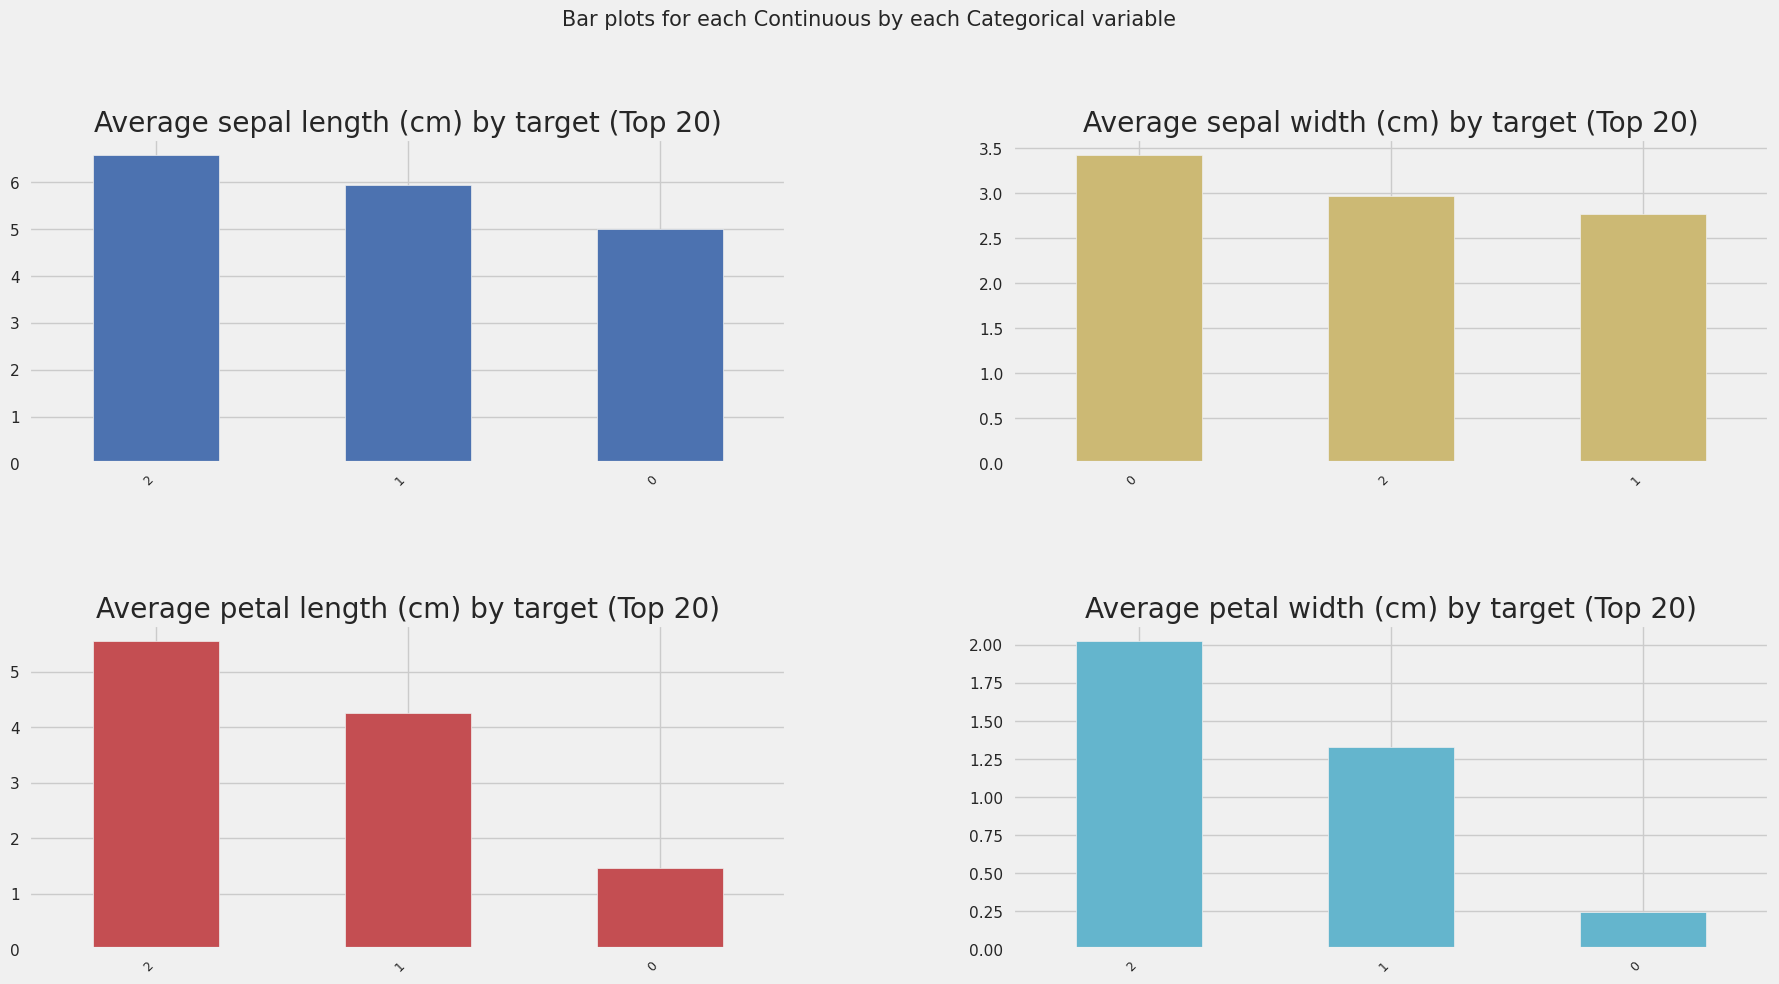

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [15]:
df.to_csv('iris.csv',index=False)
fhand = './iris.csv'
dft = AV.AutoViz(fhand)